In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Question 1: What is Anomaly Detection? Explain its types with examples

Answer:

Anomaly detection refers to the process of identifying rare items, events, or observations that raise suspicions by differing significantly from the majority of the data. These anomalies are often referred to as outliers, abnormalities, or deviants.

Types of Anomalies:

Point Anomalies: A single data instance is anomalous compared to the rest of the data.

Example: A credit card transaction of $5000 when the user typically spends $50-100.

Contextual Anomalies: A data instance is anomalous in a specific context but not otherwise.

Example: A temperature reading of 35°C might be normal in summer but anomalous in winter.

Collective Anomalies: A collection of related data instances is anomalous compared to the entire dataset.

Example: A sequence of failed login attempts from different IP addresses in a short time period.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor
Answer:

| Algorithm | Approach | Suitable Use Cases |
|---|---|---|
| Isolation Forest | Based on the concept that anomalies are few and different, making them easier to isolate. Uses random partitioning of data. | High-dimensional datasets, large datasets, when anomalies are clearly separated from normal data |
| DBSCAN | Density-based clustering that identifies dense regions and marks points in low-density regions as outliers. | Datasets with clusters of similar density, spatial data, when you don't know the number of clusters |
| Local Outlier Factor (LOF) | Compares the local density of a point to the local densities of its neighbors. Points with significantly lower density are outliers. | Datasets with varying densities, when anomalies might be in regions of different density |

Question 3: Key components of a Time Series

Answer:

Trend: The long-term increase or decrease in the data.

    Example: Increasing sales of a popular product over several years.

Seasonality: Regular patterns that repeat at fixed intervals.

    Example: Higher ice cream sales during summer months each year.

Cyclical: Patterns that occur at irregular intervals, often influenced by economic factors.

    Example: Business cycles of expansion and recession.

  Irregular/Random: Unpredictable, random variations in the data.

    Example: Unexpected drop in sales due to a temporary event.

Question 4: Stationarity in time series

Answer:

Stationarity refers to a time series whose statistical properties (mean, variance, autocorrelation) are constant over time.

Testing for stationarity:

    Visual inspection: Plot the time series to check for obvious trends or seasonality

    Statistical tests: Augmented Dickey-Fuller (ADF) test (null hypothesis: series is non-stationary)

Transforming non-stationary series:

    Differencing: Calculate differences between consecutive observations

    Transformation: Apply log, square root, or other transformations to stabilize variance

    Decomposition: Remove trend and seasonal components

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models
Answer:

Model	Structure	Application
AR (AutoRegressive)	Uses past values to predict future values: $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \epsilon_t$	When there is autocorrelation in the data
MA (Moving Average)	Uses past forecast errors to predict future values: $y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ...$	When there is dependency between observations and shocks
ARIMA	Combination of AR and MA models with differencing: ARIMA(p,d,q)	Non-seasonal time series with trends
SARIMA	Extends ARIMA to include seasonal components: SARIMA(p,d,q)(P,D,Q)s	Time series with both trend and seasonal patterns
SARIMAX	SARIMA with exogenous variables	When external factors influence the time series
Now let's proceed to the coding questions:

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models
Answer:

| Model | Structure | Application |
|---|---|---|
| AR (AutoRegressive) | Uses past values to predict future values: $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \epsilon_t$ | When there is autocorrelation in the data |
| MA (Moving Average) | Uses past forecast errors to predict future values: $y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ...$ | When there is dependency between observations and shocks |
| ARIMA | Combination of AR and MA models with differencing: ARIMA(p,d,q) | Non-seasonal time series with trends |
| SARIMA | Extends ARIMA to include seasonal components: SARIMA(p,d,q)(P,D,Q)s | Time series with both trend and seasonal patterns |
| SARIMAX | SARIMA with exogenous variables | When external factors influence the time series |
Now let's proceed to the coding questions:

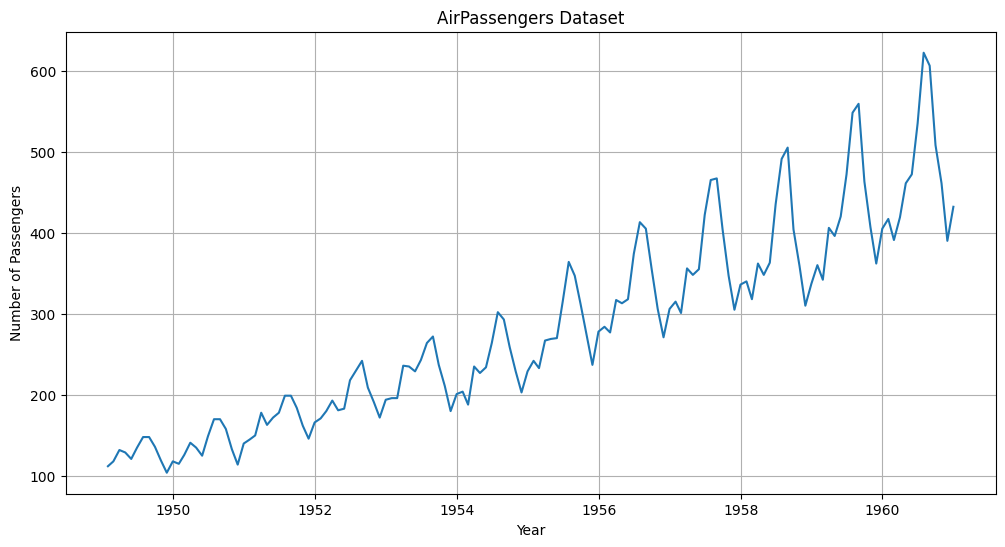

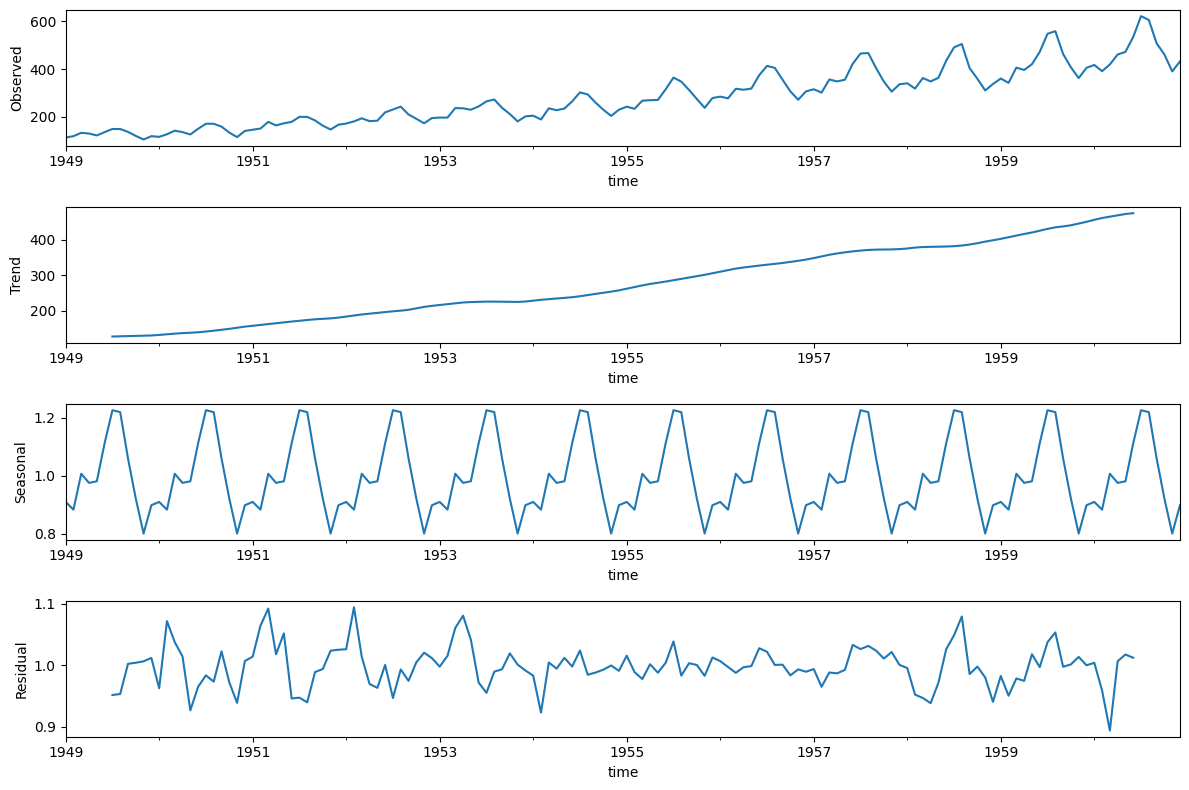

In [2]:
#Question 6: Load and decompose AirPassengers dataset
# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers')
df = data.data
df['time'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('time', inplace=True)

# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('AirPassengers Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='multiplicative', period=12)

# Plot decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

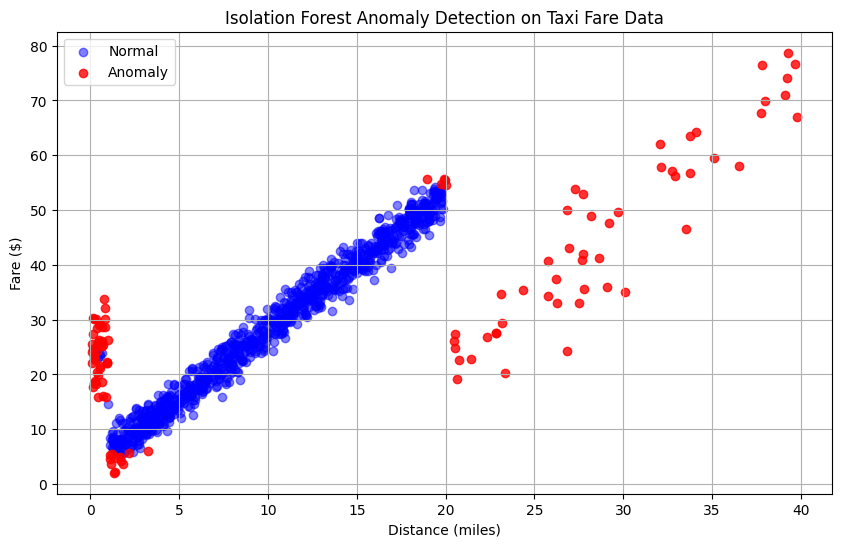

In [3]:
#Question 7: Apply Isolation Forest on NYC Taxi Fare data
# Since we don't have direct access to NYC Taxi Fare data, we'll create a synthetic dataset
# that resembles taxi fare data with some anomalies

# Create synthetic data
np.random.seed(42)
n_samples = 1000

# Normal taxi rides: distance between 1-20 miles, fare between $3 + $2.50 per mile
normal_distance = np.random.uniform(1, 20, n_samples)
normal_fare = 3 + 2.5 * normal_distance + np.random.normal(0, 2, n_samples)

# Anomalous taxi rides: either very short distance with high fare or very long distance with low fare
anomalous_distance1 = np.random.uniform(0.1, 1, 50)
anomalous_fare1 = 3 + 2.5 * anomalous_distance1 + np.random.normal(20, 5, 50)  # High fare for short distance

anomalous_distance2 = np.random.uniform(20, 40, 50)
anomalous_fare2 = 3 + 2.5 * anomalous_distance2 - np.random.normal(30, 5, 50)  # Low fare for long distance

# Combine all data
distance = np.concatenate([normal_distance, anomalous_distance1, anomalous_distance2])
fare = np.concatenate([normal_fare, anomalous_fare1, anomalous_fare2])

data = pd.DataFrame({'distance': distance, 'fare': fare})

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
predictions = iso_forest.fit_predict(data)
data['anomaly'] = predictions

# Visualize anomalies
plt.figure(figsize=(10, 6))
normal = data[data['anomaly'] == 1]
anomaly = data[data['anomaly'] == -1]

plt.scatter(normal['distance'], normal['fare'], c='blue', alpha=0.5, label='Normal')
plt.scatter(anomaly['distance'], anomaly['fare'], c='red', alpha=0.8, label='Anomaly')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')
plt.title('Isolation Forest Anomaly Detection on Taxi Fare Data')
plt.legend()
plt.grid(True)
plt.show()

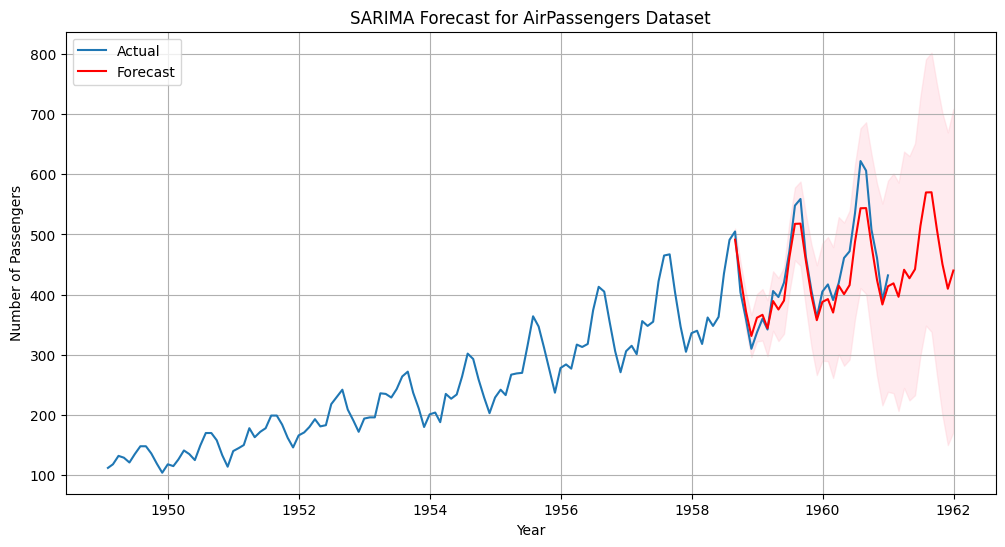

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -323.801
Date:                            Thu, 18 Sep 2025   AIC                            657.601
Time:                                    17:16:33   BIC                            669.988
Sample:                                01-31-1949   HQIC                           662.592
                                     - 07-31-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8224      0.184     -4.461      0.000      -1.184      -0.461
ma.L1          0.7176      0.224   

In [4]:
#Question 8: Train a SARIMA model on AirPassengers dataset
# Prepare the data
ts = df['value']

# Split into train and test
train = ts[:int(0.8*len(ts))]
test = ts[int(0.8*len(ts)):]

# Fit SARIMA model
# Based on the decomposition, we can see seasonal patterns, so we'll use seasonal order
sarima_model = SARIMAX(train,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results = sarima_model.fit(disp=False)

# Forecast
forecast = sarima_results.get_forecast(steps=len(test) + 12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast for AirPassengers Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Print model summary
print(sarima_results.summary())

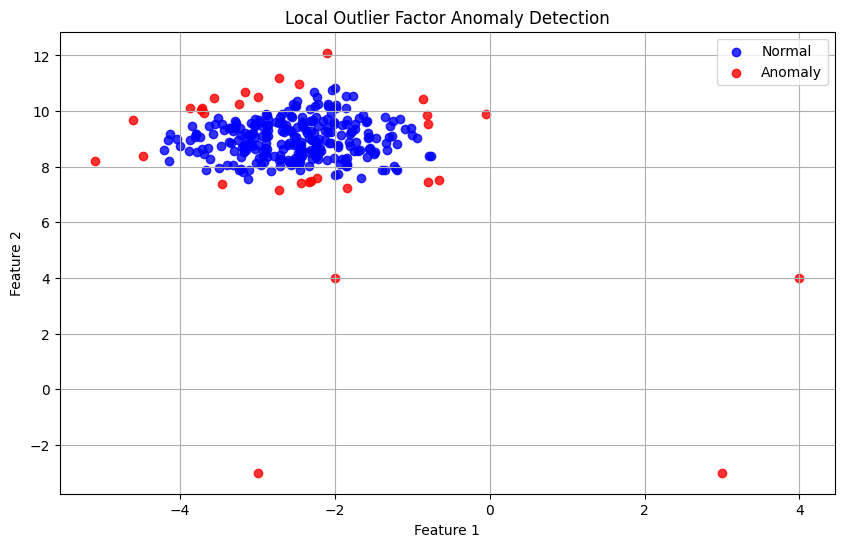

In [5]:
#Question 9: Apply LOF on a numerical dataset
# Create a synthetic dataset with anomalies
X, y = make_blobs(n_samples=300, centers=1, cluster_std=0.8, random_state=42)
X = np.append(X, [[-2, 4], [3, -3], [-3, -3], [4, 4]], axis=0)  # Add some anomalies

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot normal points
normal = X[y_pred == 1]
plt.scatter(normal[:, 0], normal[:, 1], c='blue', alpha=0.8, label='Normal')

# Plot anomalies
anomalies = X[y_pred == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', alpha=0.8, label='Anomaly')

plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Question 10: Real-time energy demand forecasting and anomaly detection

Answer:

For a power grid monitoring company with real-time data collected every 15 minutes:

Anomaly Detection Approach:
I would use a combination of Isolation Forest and a streaming adaptation of LOF. Isolation Forest is efficient for high-dimensional data and can handle the streaming nature. For contextual anomalies, I would use a sliding window approach with LOF to account for changing patterns throughout the day and seasons.

Time Series Model:
For short-term forecasting (next few hours to days), I would use SARIMAX. The exogenous variables (weather conditions, region, day of week, time of day) would be crucial for accurate predictions. The seasonal component would account for daily and weekly patterns.

  Validation and Monitoring:

-   Use rolling window cross-validation to continuously evaluate model performance

-   Monitor forecast errors (MAE, RMSE) and anomaly detection precision/recall

-   Set up alerts for performance degradation

-   Implement A/B testing for model updates.


  Business Impact:

-   Operational Efficiency: Optimize power generation and distribution

-   Cost Savings: Reduce waste by matching supply with demand

-   Reliability: Prevent blackouts by anticipating demand spikes

-   Maintenance: Identify equipment issues through abnormal consumption patterns

